## Analyzing the Effectiveness of Debt Collection Strategies


**1. Intoduction**

When trying to collect some of the money from a debt that has been legally declared "uncollectable", banks will assess the expected recovery amount using a function. This function uses a variety of factors to determine the willingnesss of a customer to pay, such as the size of the debt, the probability of the customer paying, and a variety of other factors. 

Recovery strategies are seperated into levels, and they vary depending on the expected recovery amount. The higher the expected recovery amount, the more resources are employed by the bank to recover it. Level 0 customers are simply added to a database where they are sent automated emails and phone calls. Level 1 customers receive \\$50 worth of attention from human rescources within the bank who attempt to optain payments. Level 2 customers receive an additional \\$50 worth, and so on. 

This notebook determines whether these additional expenditures in manpower from the Bank actually result in enough of an increase in recovered debts to justify their costs. 

In [19]:
# Import modules
import pandas as pd
import numpy as np

# Read in dataset
df = pd.read_csv('bank_data.csv')

# Print the first few rows of the DataFrame
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


**2. Exploratory Data Analysis and Visualization ** 

Do other features vary systematically with the expected recovery amounts, such as age, or sex? The data requires explaratory analysis to determine if there are other factors that can affect a banks ability to recover their debt. It is important to determine whether variations in amount recovered are due to the banks recovery strategies and not other outlying factors. 

First, a scatter plot comparing Age vs Expected Recovery Amount will be used to see if there is an obvious jump in the amount recovered around debts which are above \\$1000, where the Level 1 recovery strategy is employed. 

No handles with labels found to put in legend.


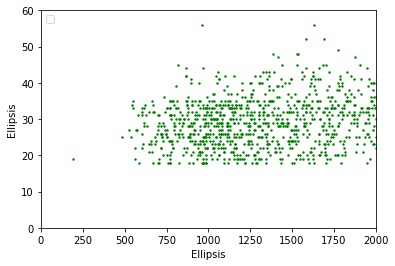

In [20]:
# Scatter plot of Age vs. Expected Recovery Amount
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=df['expected_recovery_amount'], y=df['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel(...)
plt.ylabel(...)
plt.legend(loc=2)

plt.show()

**3. The Effects of Age on Expected Recovery Amount**

The scatter plot did not reveal any obvious anomolies around \\$1000. 

Next, the Kruskal-Wallis test will be employed to verify numerically what was seen in the Scatter Plot. The range explored will be between \\$900 and \\$1100, which is right around the threshold of $1000 being examined. If there is a discontinuity in the average age of the customers around this threshold, it would indicate that age plays a meaningful role in the debt collection strategies of the bank. 

In [21]:
# Import stats module
from scipy import stats

# Compute average age just below and above the threshold
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test 
Level_0_age = era_900_1100.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age) 

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

**4. The Effects of Sex on Expected Recovery Amount**

Neither exploring the data visually through a scatter plot nor statistically through a Kruskal-Wallis test revealed a major difference in the average customer age near the Level I threshold of \\$1000. 

Next, the potential effects that sex may have on Expected Recovery Amount must also be determined using cross-tabs and chi-square tests of the percentage of customers that are male vs. female.

In [22]:
# Number of customers in each category
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) & 
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'], 
                       df['sex'])

print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)

print(p_val)
                

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
0.5377947810444592


**5. Exploratory Graphical Analysis on Recovery Amounts**

Customers close to the Level 1 Threshold of \\$1000 are on average similar in their age and sex. The relationship between the actual recovery amount and the Expected Recovery Amount can now be examined with confidence that the effect of outlying variables on these two features of interest are negligable. 

Next, a scatter plot will be developed in order to visualize the relationship between Active Recovery Amount and Expected Recovery Amount. It is helpful in determining if there is any obvious disconuity between EPA's of \\$900 and \\$1100, as if there was, it would indicate that there is a substantial difference between the bank's Level 0 and Level 1 strategies. 

No handles with labels found to put in legend.


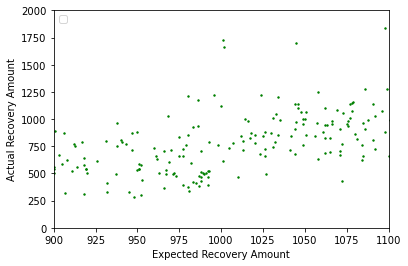

In [23]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount 
plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)
plt.show()

**6. Measuring the Discontinuity Visualized in the Graphical Analysis**

With a cursory glance, there appears to be discontinuity in the Actual Recovery Amount as the Expected Recovery Amount reaches \\$1000, which would indicate that the Level 1 strategies do have an effect on Actual Recovery Amount. A statistical test is now neccessary to verify this disconuity. 

The Kruskal-Wallis test will be used to verify if there is a discontinuity with the Actual Recovery Amount above the Level 1 threshold of \\$1000, just as was done with Age. The two parameters used in the test will be the Expected Recovery Amount from \\$900 to \\$1100 and then a narrower range of \\$950 to \\$1050 in order to verify that the results are consistent. 

In [24]:
# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)


KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)


KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

**7. Regression modeling**

A regression-based approach will be used to determine the program impact at the Level 1 threshold of \\$1000. 

Two models will be used. The first will predict the Actual Recovery Amount as a function of the Expected Recovery Amount, and it will determine how the two variables relate to eachother. 

In [25]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Fri, 27 Aug 2021   Prob (F-statistic):           1.56e-13
Time:                            15:26:38   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**8. Regression Modeling with the True Threshold Included**

At 0.256, the Expected Recovery Amount's Regression Coefficient is statistically significant. Expected Recovery Amount heavily affects the Actual Recovery Amount. 

The Second Regression Model will factor in the true threshold of the model (\\$1000 in this case). 

An indicator variable (a 1 or a 0) will indicate whether the Expected Recovery Amount was greater than $1000. When the true threshold is added, the Regression Coefficiant will represent the additional amount of money that was recovered by the bank because of the higher recovery strategy.

If the higher recovery strategy truly resulted in a higher Actual Recovery Amount on average, the Regression coefficient will be greater then zero (indicating a heavy amount of discontinuity at the \\$1000 threshold). If the higher recovery strategy did not result in a higher Actual Recovery Amount on Average, the Regression Coefficient will not be statistically significant. This is because a low or negligible amount of discontinuity at the \\$1000 threshold would indicate that the amount of money recovered by the bank increased only as the Expected Amount Recovered also increased, and that there was not a significant change to this pattern after the bank deployed it's additional resources for these debts. 

In [26]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Fri, 27 Aug 2021   Prob (F-statistic):           1.56e-13
Time:                            15:26:38   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**9. Refining the Model**

The regression coefficient of the true threshold was highly statistically significant at \\$278. This would indicate the bank is receiving a high return on it's \\$50 per customer strategy. 

To verify the results, the test will be repeated with a narrower window at $950 to $1050 to further isolate any discontinuity after the \\$1000 threshold. 

In [27]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=950)]

# Define X and y 
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 27 Aug 2021   Prob (F-statistic):           1.83e-15
Time:                            15:26:38   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**10. Conclusion**

Whether a wide window of \\$900 to \\$1100, or a narrow window of \\$950 to \\$1050 is used, Recovery Amount in the higher strategy is greater then the \\$50 per customer cost that the bank incurs when using a level 1 strategy. Therefore, the higher strategy is worth the cost. 